### Tingkat Kepercayaan Masyarakat terhadap Menteri Keuangan Baru Purbaya Yudhi Sadewa



### 1. Scraping Data
Scraping diambil dari komentar masyarakat di channel youtube KompasTV saat Menteri Purbaya melakukan rapat perdana dengan DPR

In [4]:
!pip install youtube-comment-downloader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 10.4 MB/s eta 0:00:00


In [5]:
from youtube_comment_downloader import YoutubeCommentDownloader
import pandas as pd

downloader = YoutubeCommentDownloader()

video_url = 'https://www.youtube.com/watch?v=hCRdLMChOzc'

comments = downloader.get_comments_from_url(video_url)


### 2. Case Folding


In [6]:
all_comments = []
for c in comments:
    all_comments.append(c['text'].lower())

# Buat DataFrame
df = pd.DataFrame(all_comments, columns=['komentar'])

# Simpan ke file CSV
df.to_csv('hasil_scraping_komentar.csv', index=False)

print("Hasil scraping telah disimpan di file 'hasil_scraping_komentar.csv'")

Hasil scraping telah disimpan di file 'hasil_scraping_komentar.csv'


### 3. Analisis kepuasan dengan dictionary sederhana

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

                                            komentar        sentimen
0  aku sempat berpikir ada ga sih anggota dpr yg ...  Kurang Percaya
1  kalau p purbaya pinter gak bolet seperti kalia...  Kurang Percaya
2  memang p purbaya pinter kenapa dua hari aja fi...  Kurang Percaya
3                persis pinter padahal ting kosong 😊  Kurang Percaya
4                                          gjih buta  Kurang Percaya

Jumlah komentar per sentimen:
sentimen
Kurang Percaya    1140
Percaya             44
Name: count, dtype: int64


/tmp/ipython-input-1278832436.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentimen_counts.index, y=sentimen_counts.values, palette='pastel')


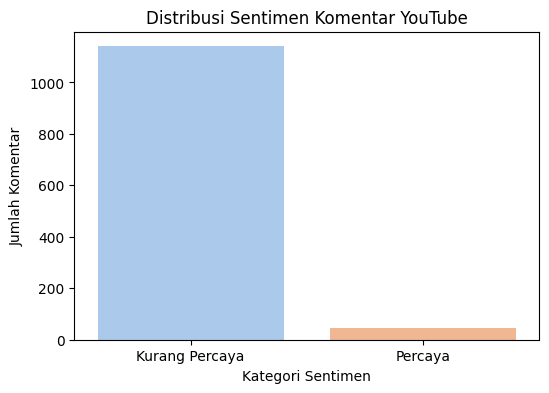

In [ ]:
# Daftar kata positif dan negatif sederhana
percaya = ['baik', 'bagus', 'hebat', 'puas', 'mantap', 'percaya', 'optimis']
kurang_percaya = ['buruk', 'gagal', 'tidak', 'percaya', 'meragukan', 'parah', 'aneh', 'negatif']

# Fungsi analisis sentimen sederhana
def analisis_sentimen(teks):
    score = 0
    kata = teks.split()
    for word in kata:
        if word in percaya:
            score += 1
        elif word in kurang_percaya:
            score -= 1
    if score > 0:
        return 'Percaya'
    else:
        return 'Kurang Percaya'


# Terapkan analisis sentimen ke kolom komentar
df['sentimen'] = df['komentar'].apply(analisis_sentimen)

# Tampilkan hasil analisis (5 baris pertama)
print(df.head())

# Hitung jumlah tiap sentimen
sentimen_counts = df['sentimen'].value_counts()

print("\nJumlah komentar per sentimen:")
print(sentimen_counts)

# Visualisasi grafik distribusi sentimen
plt.figure(figsize=(6,4))
sns.barplot(x=sentimen_counts.index, y=sentimen_counts.values, palette='pastel')
plt.title('Distribusi Sentimen Komentar YouTube')
plt.xlabel('Kategori Sentimen')
plt.ylabel('Jumlah Komentar')
plt.show()

### 4. Pre-Processing

In [12]:
!pip install pandas

In [15]:
!pip install nltk

In [17]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [26]:
import pandas as pd
import string
import re
import nltk
from nltk.corpus import stopwords

# Fungsi untuk menghapus tanda baca
def hapus_tanda_baca(teks):
    return teks.translate(str.maketrans('', '', string.punctuation))

# Fungsi hapus emoji
def hapus_emoji(teks):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticon
        u"\U0001F300-\U0001F5FF"  # simbol & pictograph
        u"\U0001F680-\U0001F6FF"  # transport & map
        u"\U0001F1E0-\U0001F1FF"  # bendera
        u"\U00002700-\U000027BF"  # dingbats
        u"\U000024C2-\U0001F251"  # simbol tambahan
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', teks)

# Fungsi hapus whitespace
def hapus_whitespace(teks):
    return " ".join(teks.split())

# Fungsi hapus stopwords
stop_words = set(stopwords.words('indonesian'))
def hapus_stopwords(teks):
    kata = teks.split()
    kata_bersih = [w for w in kata if w not in stop_words]
    return " ".join(kata_bersih)

# Gabungkan preprocessing
def bersihkan_komentar(teks):
    teks = hapus_emoji(teks)
    teks = hapus_tanda_baca(teks)
    teks = hapus_whitespace(teks)
    teks = hapus_stopwords(teks)
    return teks

# Tambahkan kolom komentar bersih
df['setelah_preprocesing'] = df['komentar'].apply(bersihkan_komentar)

# Simpan hasilnya ke file CSV
df.to_csv('hasil_preprocesing.csv', index=False)

print("Hasil preprocessing telah ditambahkan dan disimpan di 'hasil_scraping_komentar.csv'")


Hasil preprocessing telah ditambahkan dan disimpan di 'hasil_scraping_komentar.csv'


### 5. Normalisasi

In [27]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 6.8 MB/s eta 0:00:00


In [32]:
import pandas as pd
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Baca file hasil preprocessing sebelumnya
df = pd.read_csv('hasil_scraping_komentar.csv')

# Isi NaN dengan string kosong agar tidak error
df['komentar_bersih'] = df['komentar_bersih'].fillna('')

# Buat stemmer Bahasa Indonesia dengan Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi stemming dengan konversi ke string (untuk keamanan)
def lakukan_stemming(teks):
    teks = str(teks)  # pastikan tipe string
    return stemmer.stem(teks)

# Terapkan stemming dan simpan ke kolom baru
df['setelah_normalisasi'] = df['setelah_preprocesing'].apply(lakukan_stemming)

# Hapus baris duplikat berdasarkan kolom hasil stemming
df = df.drop_duplicates(subset='setelah_normalisasi').reset_index(drop=True)

# Simpan ke file CSV baru
df.to_csv('komentar_setelah_normalisasi.csv', index=False)

print("Proses stemming dan penghapusan duplikat selesai, hasil disimpan di 'komentar_setelah_preprocessing.csv'")


Proses stemming dan penghapusan duplikat selesai, hasil disimpan di 'komentar_setelah_preprocessing.csv'


In [39]:
def hapus_singkatan(teks):
    daftar_singkatan = {
        'yg', 'dg', 'dgn', 'tp', 'krn', 'tdk', 'gk', 'ga', 'g', 'blm', 'skrg',
        'dr', 'jgn', 'sdh', 'udh', 'sm', 'sy', 'sd', 'bkn', 'aja', 'si', 'sok', 'kes', 'nya', 'aer', 'yah', 'klu'
    }
    kata = teks.split()
    kata_bersih = [w for w in kata if w not in daftar_singkatan]
    return " ".join(kata_bersih)

# Fungsi stopwords
def hapus_stopwords(teks):
    kata = teks.split()
    kata_bersih = [w for w in kata if w not in stop_words]
    return " ".join(kata_bersih)

def hapus_kata_duplikat(teks):
    kata_unik = []
    sudah_ada = set()
    for kata in teks.split():
        if kata not in sudah_ada:
            kata_unik.append(kata)
            sudah_ada.add(kata)
    return " ".join(kata_unik)

def normalisasi_lanjutan(teks):
    teks = hapus_singkatan(teks)
    teks = hapus_stopwords(teks)
    teks = hapus_kata_duplikat(teks)
    return teks

# Terapkan ke kolom sebelumnya (hasil dari tahap sebelumnya)
df['setelah_normalisasi1'] = df['setelah_normalisasi'].apply(normalisasi_lanjutan)

# Hapus duplikat berdasarkan hasil akhir
df = df.drop_duplicates(subset='setelah_normalisasi1').reset_index(drop=True)

# Simpan ke CSV baru
df.to_csv('komentar_setelah_normalisasi.csv', index=False)

print("Hasil disimpan di: 'komentar_setelah_normalisasi.csv'")

Hasil disimpan di: 'komentar_setelah_normalisasi.csv'


### 6. Bi-gram, Tri-gram, Wordcloud

In [40]:
!pip install pandas scikit-learn wordcloud matplotlib


In [45]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Baca data
df = pd.read_csv('komentar_setelah_normalisasi.csv')
df['setelah_normalisasi1'] = df['setelah_normalisasi1'].fillna('')

# Gabungkan semua komentar
all_text = ' '.join(df['setelah_normalisasi1'].astype(str))

# Buat file PDF
with PdfPages('visualisasi_komentar_horizontal.pdf') as pdf:

    # 1. WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_text)

    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("WordCloud - Komentar")
    pdf.savefig()
    plt.close()

    # 2. Bigram
    vectorizer_bigram = CountVectorizer(ngram_range=(2, 2))
    bigram_matrix = vectorizer_bigram.fit_transform(df['setelah_normalisasi1'])
    bigram_freq = zip(vectorizer_bigram.get_feature_names_out(), bigram_matrix.sum(axis=0).tolist()[0])
    bigram_sorted = sorted(bigram_freq, key=lambda x: x[1], reverse=True)[:10]

    # Grafik Bigram (Horizontal)
    bigram_labels, bigram_counts = zip(*bigram_sorted)
    plt.figure(figsize=(10, 6))
    bars = plt.barh(bigram_labels, bigram_counts, color='skyblue')
    plt.ylabel('Frekuensi')
    plt.title('Top 10 Bigram')
    plt.gca().invert_yaxis()

    # Tambahkan frekuensi di ujung bar
    for bar in bars:
        plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, str(int(bar.get_width())), va='center')

    pdf.savefig()
    plt.close()

    # 3. Trigram
    vectorizer_trigram = CountVectorizer(ngram_range=(3, 3))
    trigram_matrix = vectorizer_trigram.fit_transform(df['setelah_normalisasi1'])
    trigram_freq = zip(vectorizer_trigram.get_feature_names_out(), trigram_matrix.sum(axis=0).tolist()[0])
    trigram_sorted = sorted(trigram_freq, key=lambda x: x[1], reverse=True)[:10]

    # Grafik Trigram (Horizontal)
    trigram_labels, trigram_counts = zip(*trigram_sorted)
    plt.figure(figsize=(10, 6))
    bars = plt.barh(trigram_labels, trigram_counts, color='salmon')
    plt.ylabel('Frekuensi')
    plt.title('Top 10 Trigram')
    plt.gca().invert_yaxis()

    # Tambahkan frekuensi di ujung bar
    for bar in bars:
        plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, str(int(bar.get_width())), va='center')

    pdf.savefig()
    plt.close()

print("✅ Visualisasi dengan frekuensi horizontal telah disimpan di 'visualisasi_komentar.pdf'")


✅ Visualisasi dengan frekuensi horizontal telah disimpan di 'visualisasi_komentar.pdf'


In [44]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Baca data
df = pd.read_csv('komentar_setelah_normalisasi.csv')
df['setelah_normalisasi1'] = df['setelah_normalisasi1'].fillna('')

# Gabungkan semua komentar
all_text = ' '.join(df['setelah_normalisasi1'].astype(str))

# Buat file PDF untuk menyimpan semua visualisasi
with PdfPages('visualisasi_komentar_vertikal.pdf') as pdf:

    # 1. WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_text)
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("WordCloud - Komentar")
    pdf.savefig()
    plt.close()

    # 2. Bigram
    vectorizer_bigram = CountVectorizer(ngram_range=(2, 2))
    bigram_matrix = vectorizer_bigram.fit_transform(df['setelah_normalisasi1'])
    bigram_freq = zip(vectorizer_bigram.get_feature_names_out(), bigram_matrix.sum(axis=0).tolist()[0])
    bigram_sorted = sorted(bigram_freq, key=lambda x: x[1], reverse=True)[:10]

    bigram_labels, bigram_counts = zip(*bigram_sorted)
    plt.figure(figsize=(12, 6))
    bars = plt.bar(bigram_labels, bigram_counts, color='skyblue')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Frekuensi')
    plt.title('Top 10 Bigram')

    for bar in bars:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                 str(int(bar.get_height())), ha='center', va='bottom')

    pdf.savefig()
    plt.close()

    # 3. Trigram
    vectorizer_trigram = CountVectorizer(ngram_range=(3, 3))
    trigram_matrix = vectorizer_trigram.fit_transform(df['setelah_normalisasi1'])
    trigram_freq = zip(vectorizer_trigram.get_feature_names_out(), trigram_matrix.sum(axis=0).tolist()[0])
    trigram_sorted = sorted(trigram_freq, key=lambda x: x[1], reverse=True)[:10]

    trigram_labels, trigram_counts = zip(*trigram_sorted)
    plt.figure(figsize=(12, 6))
    bars = plt.bar(trigram_labels, trigram_counts, color='salmon')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Frekuensi')
    plt.title('Top 10 Trigram')

    for bar in bars:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                 str(int(bar.get_height())), ha='center', va='bottom')

    pdf.savefig()
    plt.close()

print("✅ Visualisasi vertikal berhasil disimpan ke: 'visualisasi_komentar_vertikal.pdf'")


✅ Visualisasi vertikal berhasil disimpan ke: 'visualisasi_komentar_vertikal.pdf'
